<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [47]:
import numpy as np
import pandas as pd

from translate import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from flair.models import TextClassifier
from flair.data import Sentence

In [37]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [44]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [5]:
data = pd.read_csv("archivos/hween_clean.csv")
data = data.sample(100)
data.head()

,texto,fecha,ciudad,departamento,lat,lon
1298,En lugar de asustarte me pondré un disfraz muy...,2020-10-30 23:27:57,Neiva,Huila,2.927299,-75.281885
873,Bares y comercio podrán abrir hasta las 11 p.m...,2020-10-30 19:24:31,Santa Marta,Magdalena,11.240791,-74.199040
2183,Mes de halloween el programa de,2020-10-25 18:14:18,Leticia,Amazonas,-4.215278,-69.940556
1862,Pasa en familia un Halloween divertido con el ...,2020-10-30 19:17:22,Tunja,Boyacá,5.535278,-73.367778
2169,ICBF presenta la estrategia Halloween en Famil...,2020-10-27 16:52:02,Yopal,Casanare,5.337752,-72.395859


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

### Vader Sentiment

In [13]:
translator = Translator(to_lang='en', from_lang='es')
translator.translate('Hola, ¿cómo estás?')
 
data['inglés'] = data['texto'].apply(lambda valor: translator.translate(valor))

In [19]:
vader = SentimentIntensityAnalyzer()

data['sentimiento'] = data['inglés'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,texto,fecha,ciudad,departamento,lat,lon,inglés,sentimiento
1298,En lugar de asustarte me pondré un disfraz muy...,2020-10-30 23:27:57,Neiva,Huila,2.927299,-75.281885,Instead of scaring you I will put on a very se...,0.3546
873,Bares y comercio podrán abrir hasta las 11 p.m...,2020-10-30 19:24:31,Santa Marta,Magdalena,11.240791,-74.199040,Bars and shops may open until 11 pm on Hallowe...,0.0000
2183,Mes de halloween el programa de,2020-10-25 18:14:18,Leticia,Amazonas,-4.215278,-69.940556,Halloween month program,0.0000
1862,Pasa en familia un Halloween divertido con el ...,2020-10-30 19:17:22,Tunja,Boyacá,5.535278,-73.367778,Spend a fun Halloween with the family with the...,0.8176
2169,ICBF presenta la estrategia Halloween en Famil...,2020-10-27 16:52:02,Yopal,Casanare,5.337752,-72.395859,ICBF presents the Halloween Family strategy to...,0.3818


In [27]:
data.sort_values('sentimiento')

,texto,fecha,ciudad,departamento,lat,lon,inglés,sentimiento
873,Bares y comercio podrán abrir hasta las 11 p.m...,2020-10-30 19:24:31,Santa Marta,Magdalena,11.240791,-74.199040,Bars and shops may open until 11 pm on Hallowe...,0.0000
2183,Mes de halloween el programa de,2020-10-25 18:14:18,Leticia,Amazonas,-4.215278,-69.940556,Halloween month program,0.0000
1987,Por Halloween se casan disfrazados de dinosaur...,2020-10-29 20:40:06,Ríohacha,La Guajira,11.544444,-72.907222,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.2263
727,En español: claves de redacción sobre Hallowee...,2020-10-30 19:56:40,Pereira,Risaralda,4.813333,-75.696111,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.2263
314,Una más para Halloween BR - TRÍOS Octubre 29 -...,2020-10-30 23:34:42,Barranquilla,Atlántico,10.963889,-74.796389,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.2263
...,...,...,...,...,...,...,...,...
2072,Buenos días parceras y parceros. Ya decoraron ...,2020-10-28 14:02:11,Florencia,Caquetá,1.614382,-75.606229,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.2263
34,"""Entendamos que será una Navidad distinta, com...",2020-10-30 23:24:54,Bogotá,Cundinamarca,4.649178,-74.062827,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.2263
1298,En lugar de asustarte me pondré un disfraz muy...,2020-10-30 23:27:57,Neiva,Huila,2.927299,-75.281885,Instead of scaring you I will put on a very se...,0.3546
2169,ICBF presenta la estrategia Halloween en Famil...,2020-10-27 16:52:02,Yopal,Casanare,5.337752,-72.395859,ICBF presents the Halloween Family strategy to...,0.3818


In [23]:
print("Tweet más negativo")
data.sort_values('sentimiento').iloc[0]['texto']

Tweet más negativo


'Bares y comercio podrán abrir hasta las 11 p.m. en Halloween – Hora en Punto'

In [25]:
print("Tweet más positivo")
data.sort_values('sentimiento').iloc[-1]['texto']

Tweet más positivo


'Pasa en familia un Halloween divertido con el ¨Bingo Virtual¨ que tiene preparado Ingresa a o llama a los móviles 3124463363 / 3103016536 y regístrate, para que hoy de 3:00p.m. – 5:00p.m. te diviertas.'

### Flair

In [29]:
classifier = TextClassifier.load('sentiment')

2020-11-27 13:24:40,602 loading file /Users/vivianamarquez/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [30]:
classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

data['sent_flair'] = data['texto'].apply(lambda valor: sent_flair(valor))
data.head()

2020-11-27 13:25:07,947 loading file /Users/vivianamarquez/.flair/models/sentiment-en-mix-distillbert_3.1.pt


,texto,fecha,ciudad,departamento,lat,lon,inglés,sentimiento,sent_flair
1298,En lugar de asustarte me pondré un disfraz muy...,2020-10-30 23:27:57,Neiva,Huila,2.927299,-75.281885,Instead of scaring you I will put on a very se...,0.3546,0.972420
873,Bares y comercio podrán abrir hasta las 11 p.m...,2020-10-30 19:24:31,Santa Marta,Magdalena,11.240791,-74.199040,Bars and shops may open until 11 pm on Hallowe...,0.0000,-0.620489
2183,Mes de halloween el programa de,2020-10-25 18:14:18,Leticia,Amazonas,-4.215278,-69.940556,Halloween month program,0.0000,0.736758
1862,Pasa en familia un Halloween divertido con el ...,2020-10-30 19:17:22,Tunja,Boyacá,5.535278,-73.367778,Spend a fun Halloween with the family with the...,0.8176,0.958750
2169,ICBF presenta la estrategia Halloween en Famil...,2020-10-27 16:52:02,Yopal,Casanare,5.337752,-72.395859,ICBF presents the Halloween Family strategy to...,0.3818,0.974031


In [32]:
print("Tweet más negativo")
data.sort_values('sent_flair').iloc[0]['texto']

Tweet más negativo


'Nunca me he disfrazado en halloween 🥺'

In [33]:
print("Tweet más positivo")
data.sort_values('sent_flair').iloc[-1]['texto']

Tweet más positivo


'¡Prepárate para celebrar una fiesta de halloween diferente! el preparado todos una serie de actividades para realizar en casa con los miembros de la familia que vive contigo.'

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [34]:
data['sent_flair_label'] = data['sent_flair'].apply(lambda valor: 'POSITIVO' if valor >=0 else 'NEGATIVO')

In [36]:
data['sent_flair_label'].value_counts()

POSITIVO    72
NEGATIVO    28
Name: sent_flair_label, dtype: int64

###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3

In [40]:
temp = pd.DataFrame(data['sent_flair_label'].value_counts()).reset_index()
temp.columns = ['sentimiento', 'cuántos']
temp

,sentimiento,cuántos
0,POSITIVO,72
1,NEGATIVO,28


In [63]:
trace = go.Bar(x=temp.sentimiento.values,
               y=temp.cuántos.values,
               marker=dict(color=["blue","orange"]))

layout = go.Layout(title='Sentimientos')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

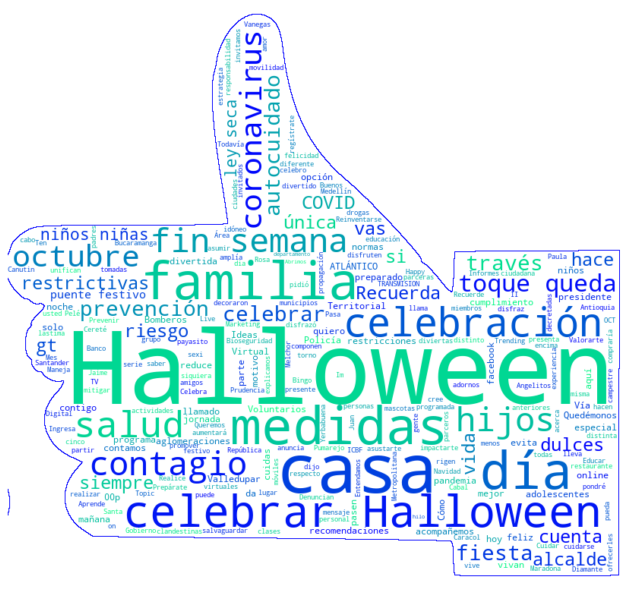

In [69]:
up = PIL.Image.open("img/up.png")
mask = np.array(up)

palabras = data[data['sent_flair_label']=='POSITIVO'].texto.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='winter',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

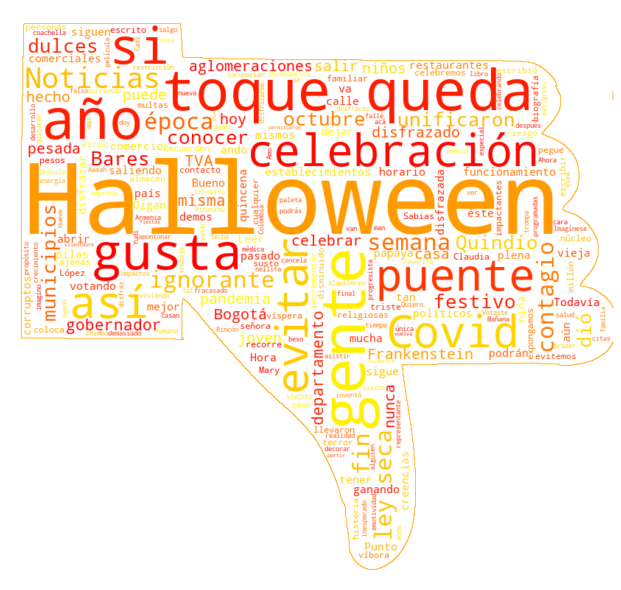

In [68]:
down = PIL.Image.open("img/down.png")
mask = np.array(down)

palabras = data[data['sent_flair_label']=='NEGATIVO'].texto.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='autumn',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='orange').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()